<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 2

</h4>

# Personal Data

In [119]:
# Set your student number
student_number = 400100554
Name = 'Seyed Mohammad'
Last_Name = 'Ojagh kazzazi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch. 

## Question 1) Convolutional Neural Networks ``(50 pt.)``

In this question, you'll be coding up a convolutional neural network from scratch to classify images using PyTorch.  

### Instructions
- Install PyTorch following the instructions [here](https://pytorch.org/).
- Install the [`torchinfo` package](https://github.com/TylerYep/torchinfo) to visualize the network architecture and the number of parameters. The maximum number of parameters you are allowed to use for your network is **100,000**. 
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.

### Data Preparation
In this assignment, we will use the Fashion-MNIST dataset. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  

#### Data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.  

#### Labels

Each training and test example is assigned to one of the following labels:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Fashion-MNIST is included in the `torchvision` library.

In [120]:
# Import required packages
from torchvision.datasets import FashionMNIST
from torchvision.transforms import Compose, ToTensor, Normalize
import matplotlib.pyplot as plt
import numpy as np

In [121]:
# Transform to normalize the data and convert to a tensor
transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])

# Download the data
dataset = FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)

### Data Exploration
Let's take a look at the classes in our dataset.

In [122]:
print(dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Now, visualize an instance from each class.

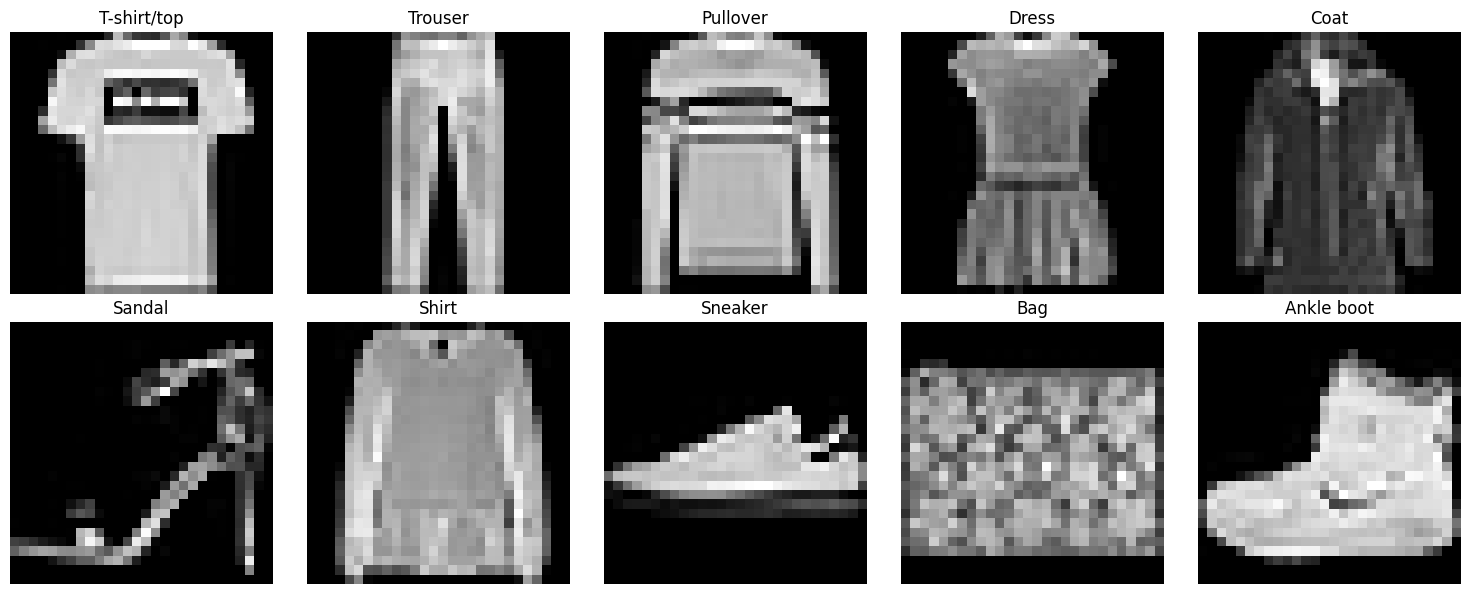

In [123]:

images_per_class = {class_name: None for class_name in dataset.classes} #create dintionary with class name as key and None as value


for image, label in dataset: # Iterate over the dataset until we have one image per class
    class_name = dataset.classes[label]
    if images_per_class[class_name] is None:
        images_per_class[class_name] = image
    if all(image is not None for image in images_per_class.values()):
        break

# Create a grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# Plot one image per class
for ax, (class_name, image) in zip(axs.flatten(), images_per_class.items()):
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(class_name)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Creating Training and Validation Datasets

The `split_indices` function takes in the size of the entire dataset, `n`, the fraction of data to be used as validation set, `val_frac`, and the random seed and returns the indices of the data points to be added to the validation dataset. 

In [124]:
def split_indices(n, val_frac, seed):
    # Determine the size of the validation set
    n_val = int(val_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [125]:
######################
#   YOUR CODE HERE   #
######################
val_frac = 0.2 ## Set the fraction for the validation set
rand_seed = 42 ## Set the random seed

train_indices, val_indices = split_indices(len(dataset), val_frac, rand_seed)
print("number of samples in training set: {}".format(len(train_indices)))
print("number of samples in validation set: {}".format(len(val_indices)))

number of samples in training set: 48000
number of samples in validation set: 12000


Next, we make use of the built-in dataloaders in PyTorch to create iterables of our our training and validation sets. This helps in avoiding fitting the whole dataset into memory and only loads a batch of the data that we can decide. 

In [126]:
# Import required packages
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [127]:
batch_size = 64  # Set the batch size

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                     batch_size,
                     sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,
                   batch_size,
                   sampler=val_sampler)

Plot images in a sample batch of data.

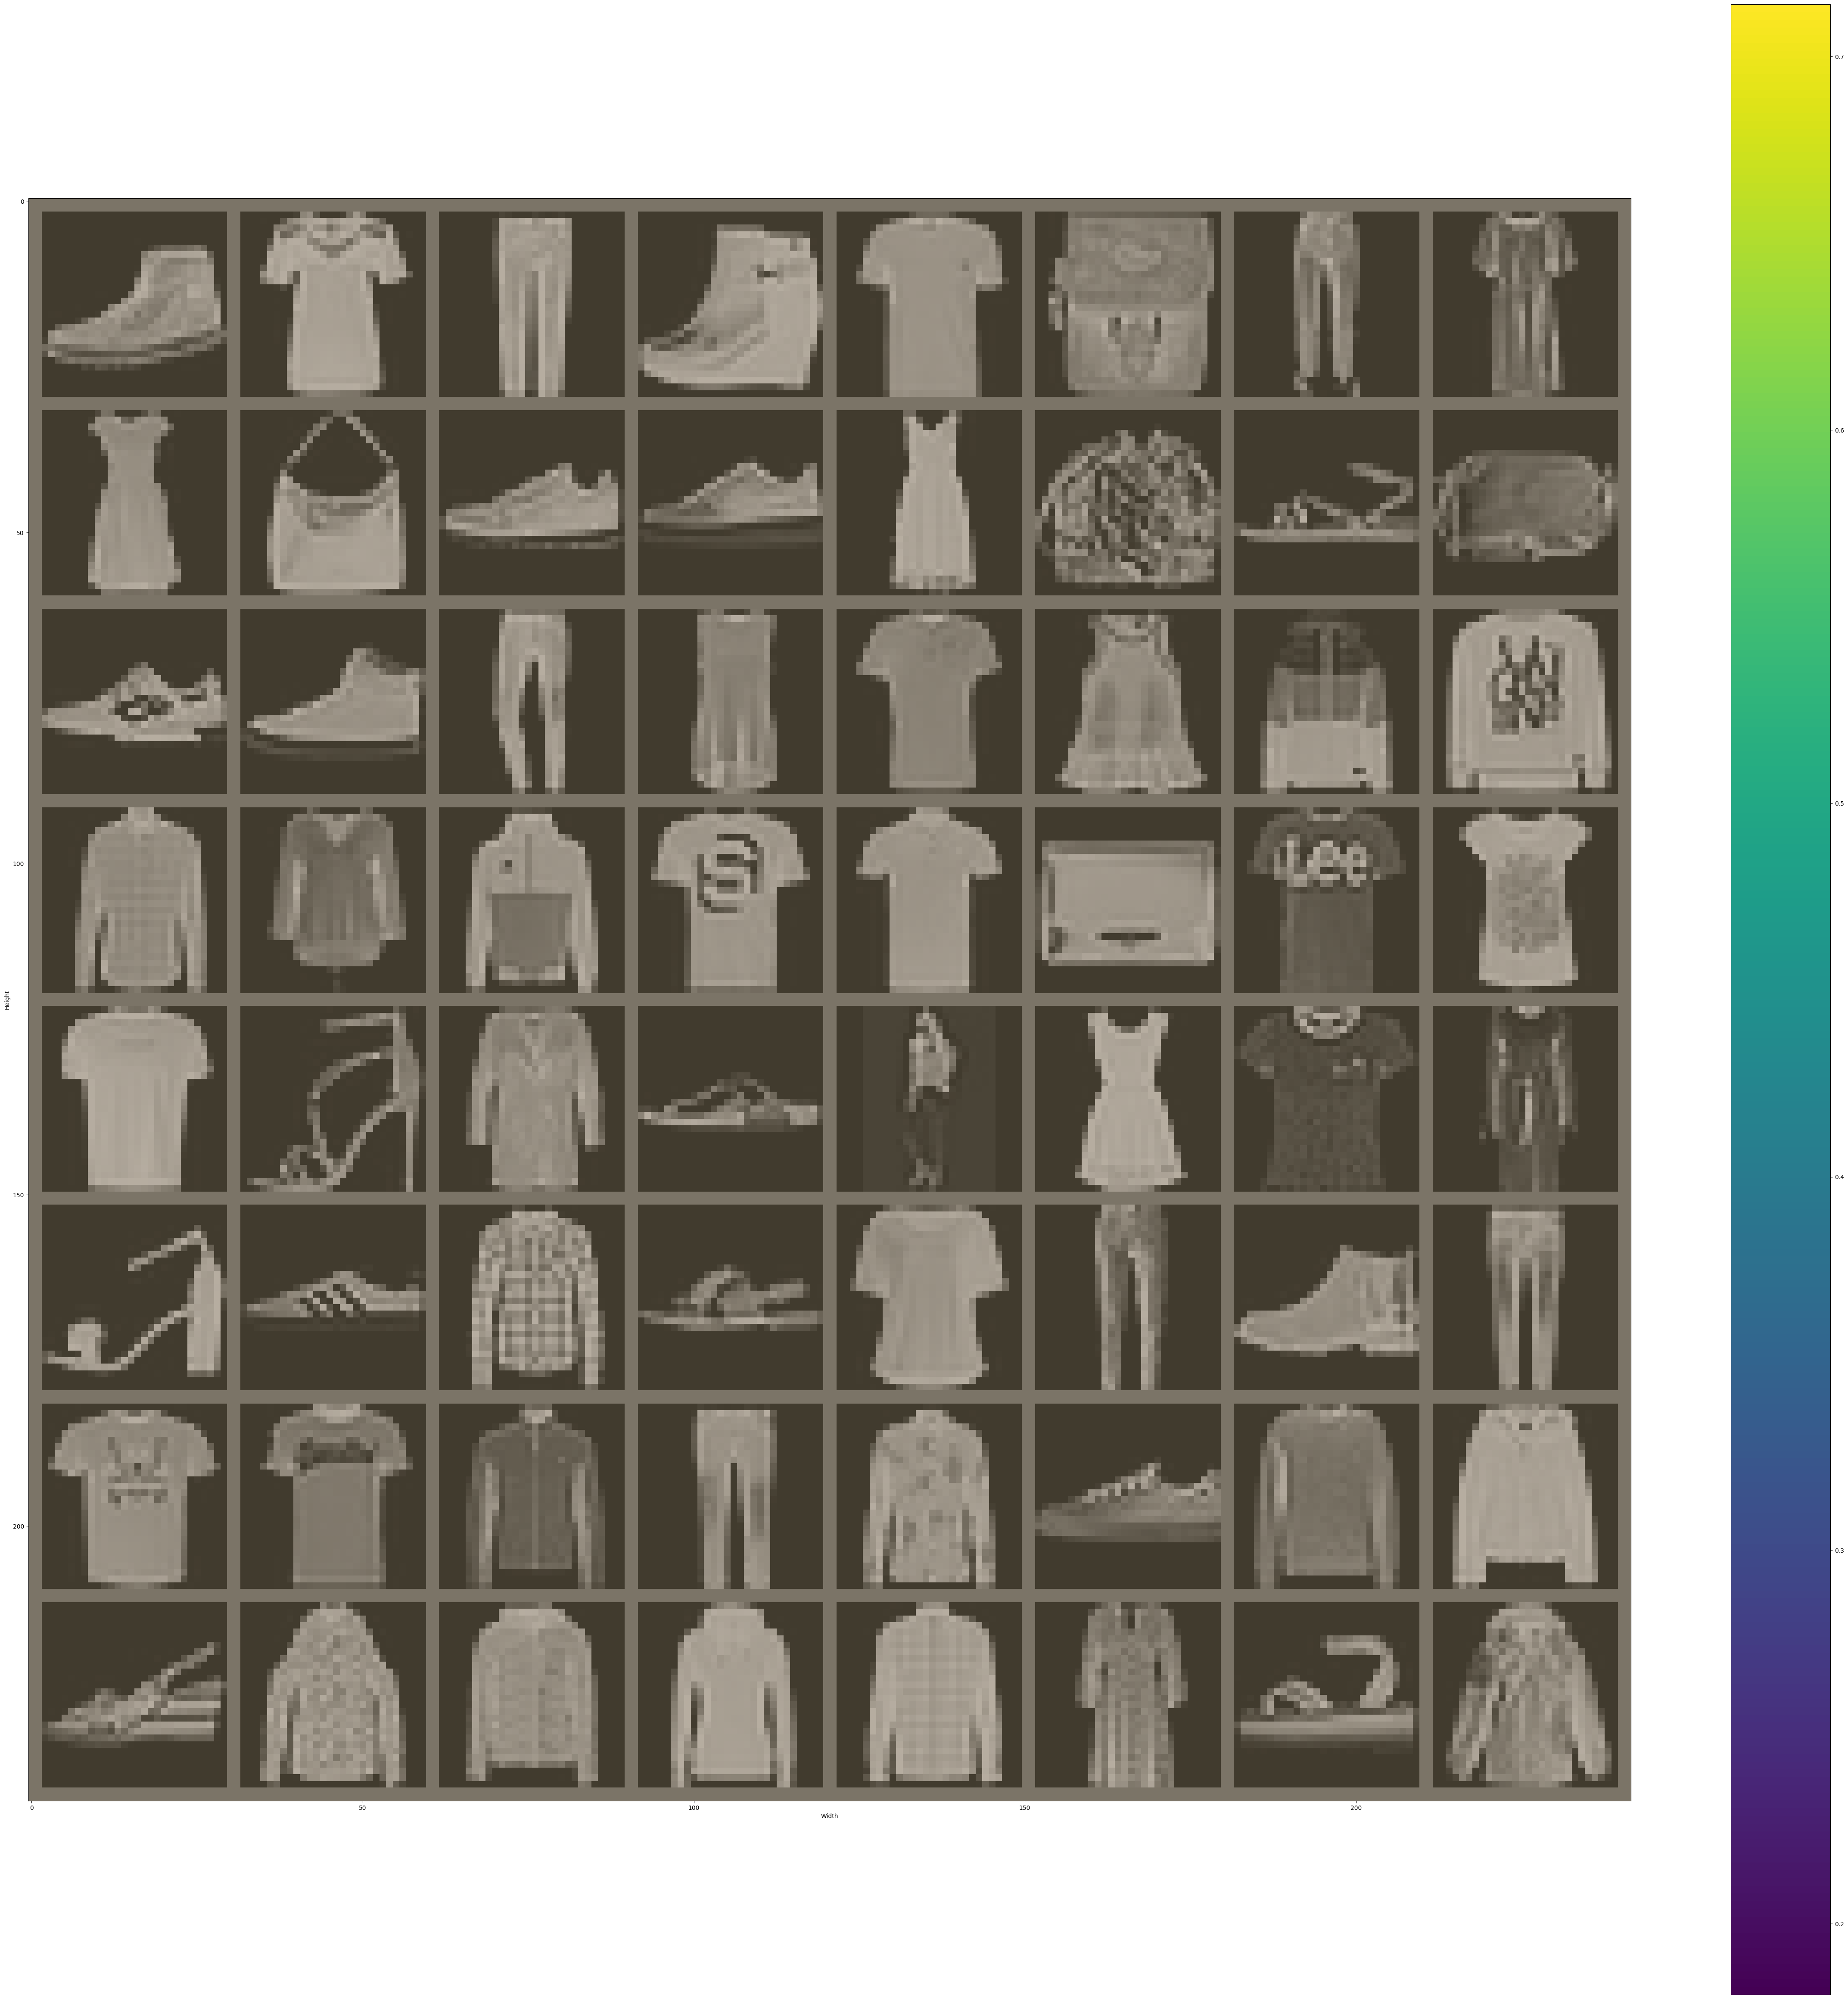

In [128]:
import matplotlib.pyplot as plt
import torchvision

# Get a batch of training data
inputs, classes = next(iter(train_dl))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(60,60))  # Increase figure size
    plt.imshow(inp)
    plt.xlabel("Width")  # Add x-axis label
    plt.ylabel("Height")  # Add y-axis label
    plt.colorbar()  # Add colorbar
    plt.pause(0.001)  # pause a bit so that plots are updated

# Plot the images in the batch, along with the corresponding labels
imshow(out, title=[x for x in classes])

### Building the Model
Create your model by defining the network architecture in the `ImageClassifierNet` class.<br>
**NOTE:** The number of parameters in your network must be $\leq$ 100,000.

In [129]:
# Import required packages
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchinfo import summary

In [130]:
class ImageClassifierNet(nn.Module):
    def __init__(self, n_channels=1):
        super(ImageClassifierNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(n_channels, 10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(10, 24, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(24*7*7, 48),
            nn.ReLU(),
            nn.Linear(48, 10)
        )

    def forward(self, X):
        X = self.features(X)
        X = X.view(X.shape[0], -1)
        X = self.classifier(X)
        return X

In [182]:
model = ImageClassifierNet()

The following code block prints your network architecture. It also shows the total number of parameters in your network (see `Total params`).  

**NOTE: The total number of parameters in your model should be <= 100,000.**

In [132]:
summary(model, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifierNet                       [64, 10]                  --
├─Sequential: 1-1                        [64, 24, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 10, 28, 28]          100
│    └─ReLU: 2-2                         [64, 10, 28, 28]          --
│    └─MaxPool2d: 2-3                    [64, 10, 14, 14]          --
│    └─Conv2d: 2-4                       [64, 24, 14, 14]          2,184
│    └─ReLU: 2-5                         [64, 24, 14, 14]          --
│    └─MaxPool2d: 2-6                    [64, 24, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  --
│    └─Linear: 2-7                       [64, 48]                  56,496
│    └─ReLU: 2-8                         [64, 48]                  --
│    └─Linear: 2-9                       [64, 10]                  490
Total params: 59,270
Trainable params: 59,270
Non-trainable params: 0
Total 

### Train the model
Complete the `train_model` function to train your model on a dataset. Tune your network architecture and hyperparameters on the validation set.

In [216]:
def train_model(n_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr):
    """
    Trains the model on a dataset.
    
    Args:
        n_epochs: number of epochs
        model: ImageClassifierNet object
        train_dl: training dataloader
        val_dl: validation dataloader
        loss_fn: the loss function
        opt_fn: the optimizer
        lr: learning rate
    
    Returns:
        The trained model. 
        A tuple of (model, train_losses, val_losses, train_accuracies, val_accuracies)
    """
    # Record these values the end of each epoch
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
    
    optimizer = opt_fn(model.parameters(), lr=lr)
    
    for epoch in range(n_epochs):
        model.train()
        batch_losses = []
        for X, y in train_dl:
            optimizer.zero_grad()
            outputs = model(X)
            loss = loss_fn(outputs, y)
            loss.backward()
            optimizer.step()
            batch_losses.append(loss.item())
        train_losses.append(np.mean(batch_losses))
        
        train_accuracies.append(100 * sum([1 for x in batch_losses if x < 0.5]) / len(batch_losses))
        
        if len(val_dl) == 0:
            print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {np.mean(batch_losses):.4f}')
            continue
        
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X, y in val_dl:
                outputs = model(X)
                loss = loss_fn(outputs, y)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += y.size(0)
                correct += (predicted == y).sum().item()
        
        
        val_losses.append(val_loss / len(val_dl))
        val_accuracies.append(100* correct / total)
        
        
        print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {np.mean(batch_losses):.4f}, Val Loss: {val_loss / len(val_dl):.4f}, Val Acc: {100 * correct / total:.2f}%')
    
    return model, train_losses, val_losses, train_accuracies, val_accuracies

In [217]:
num_epochs = 10  # Number of training epochs
loss_fn = nn.CrossEntropyLoss()  # Define the loss function
opt_fn = optim.Adam  # Select an optimizer
lr = 0.001  # Set the learning rate
model = ImageClassifierNet()

In [218]:
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(num_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr)

Epoch 1/10, Train Loss: 0.5945, Val Loss: 0.4267, Val Acc: 84.37%
Epoch 2/10, Train Loss: 0.3700, Val Loss: 0.3497, Val Acc: 87.42%
Epoch 3/10, Train Loss: 0.3261, Val Loss: 0.3197, Val Acc: 88.35%
Epoch 4/10, Train Loss: 0.2968, Val Loss: 0.3039, Val Acc: 89.03%
Epoch 5/10, Train Loss: 0.2751, Val Loss: 0.2832, Val Acc: 89.73%
Epoch 6/10, Train Loss: 0.2588, Val Loss: 0.2699, Val Acc: 90.14%
Epoch 7/10, Train Loss: 0.2400, Val Loss: 0.2598, Val Acc: 90.19%
Epoch 8/10, Train Loss: 0.2291, Val Loss: 0.2614, Val Acc: 90.44%
Epoch 9/10, Train Loss: 0.2159, Val Loss: 0.2889, Val Acc: 89.57%
Epoch 10/10, Train Loss: 0.2066, Val Loss: 0.2512, Val Acc: 90.78%


### Plot loss and accuracy

In [220]:
def plot_accuracy(train_accuracies, val_accuracies):
    """Plot accuracies"""
    plt.plot(train_accuracies, "-x")
    plt.plot(val_accuracies, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Training", "Validation"])
    plt.title("Accuracy vs. No. of epochs")

def plot_losses(train_losses, val_losses):
    """Plot losses"""
    plt.plot(train_losses, "-x")
    plt.plot(val_losses, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Training", "Validation"])
    plt.title("Loss vs. No. of Epochs")

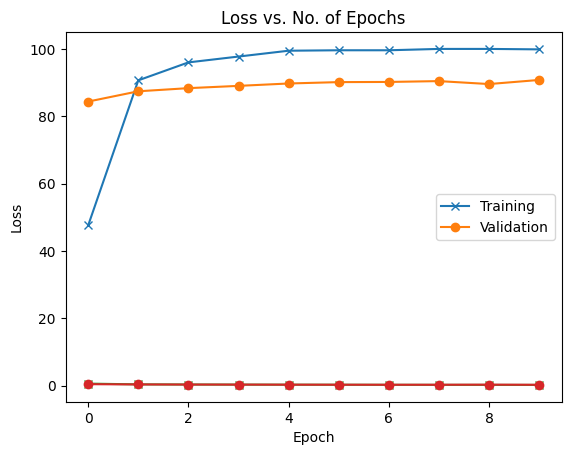

In [221]:
plot_accuracy(train_accuracies, val_accuracies)
plot_losses(train_losses, val_losses)

### Train a model on the entire dataset

In [212]:
indices, _ = split_indices(len(dataset), 0, rand_seed)

sampler = SubsetRandomSampler(indices)
dl = DataLoader(dataset, batch_size, sampler=sampler)

In [213]:
num_epochs = 10  # Max number of training epochs
lr = 0.001  # Set the learning rate

In [222]:
model, _, _, _, _ = train_model(num_epochs, model, dl, [], loss_fn, opt_fn, lr)

Epoch 1/10, Train Loss: 0.2091
Epoch 2/10, Train Loss: 0.1975
Epoch 3/10, Train Loss: 0.1889
Epoch 4/10, Train Loss: 0.1792
Epoch 5/10, Train Loss: 0.1722
Epoch 6/10, Train Loss: 0.1646
Epoch 7/10, Train Loss: 0.1579
Epoch 8/10, Train Loss: 0.1518
Epoch 9/10, Train Loss: 0.1456
Epoch 10/10, Train Loss: 0.1388


### Check Predictions
Now, you should evaluate your model on dataset. Specifically, you should calculate the class probabilities for each image, and then visualize these probabilities along with the image itself. Please include a function `view_prediction` in your code that takes an image, its label, the calculated probabilities, and the list of class names as input, and plots the image along with the probabilities.

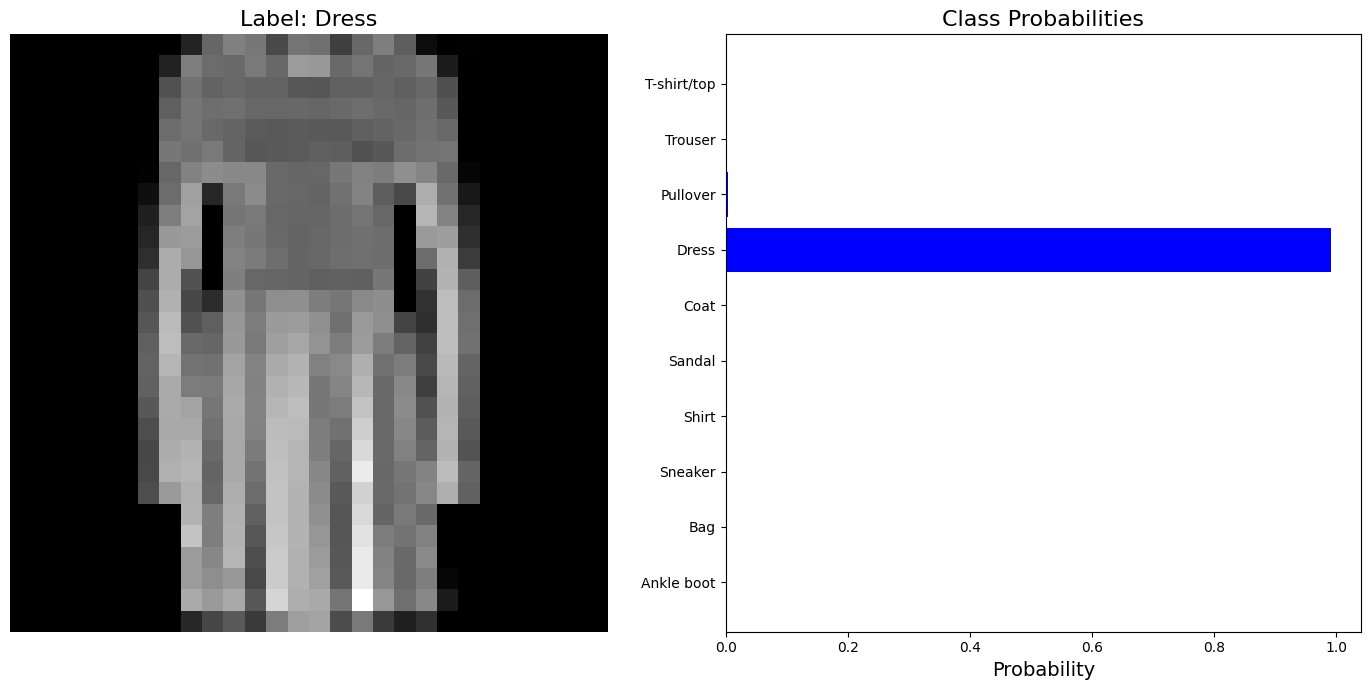

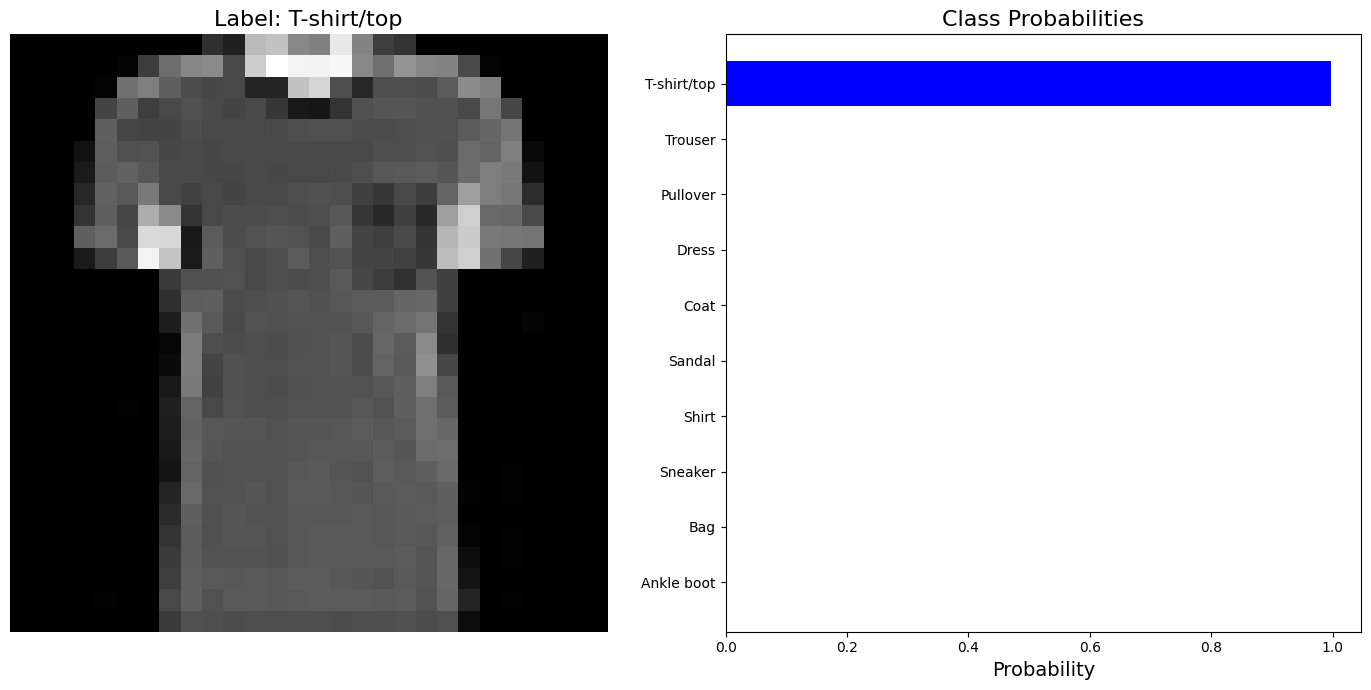

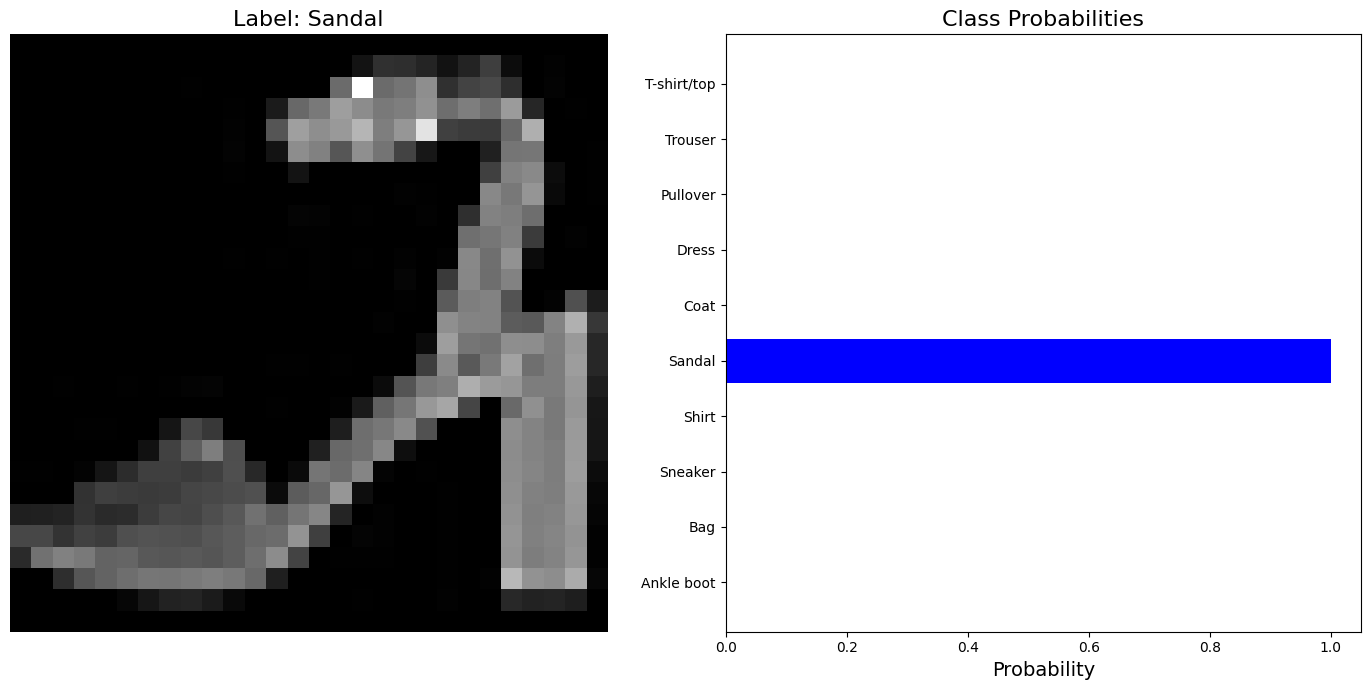

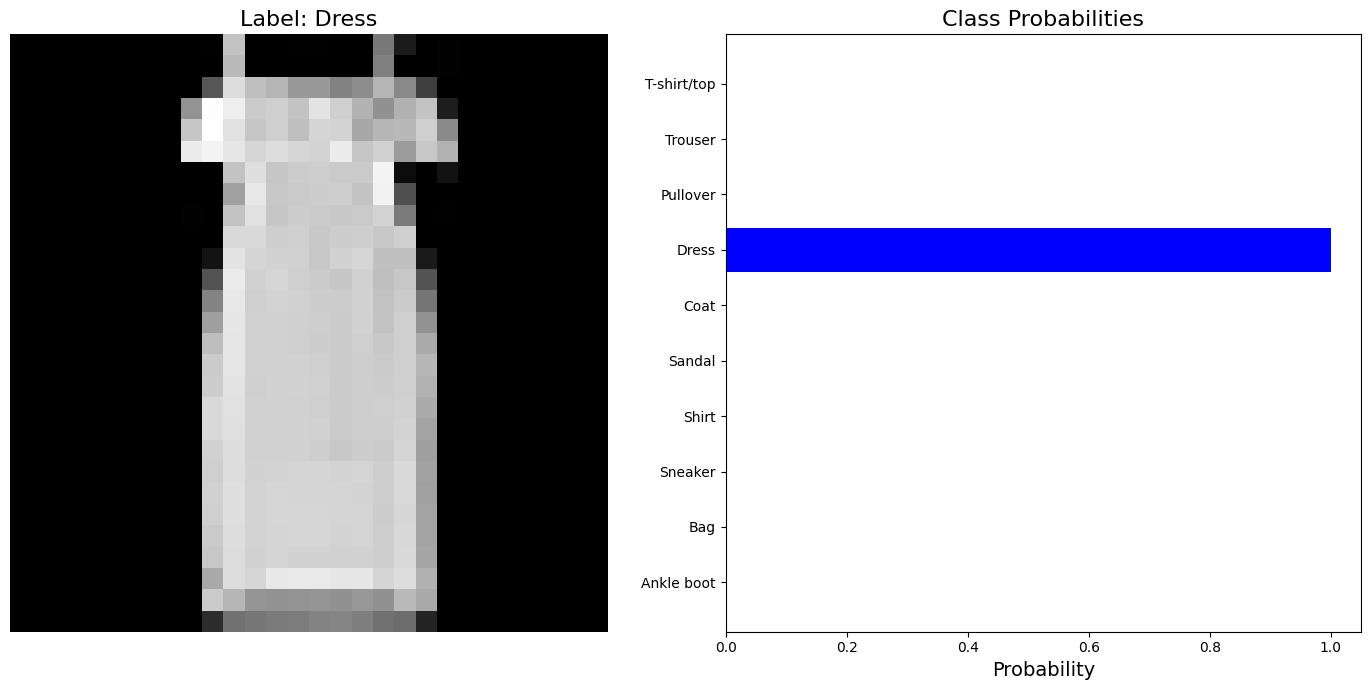

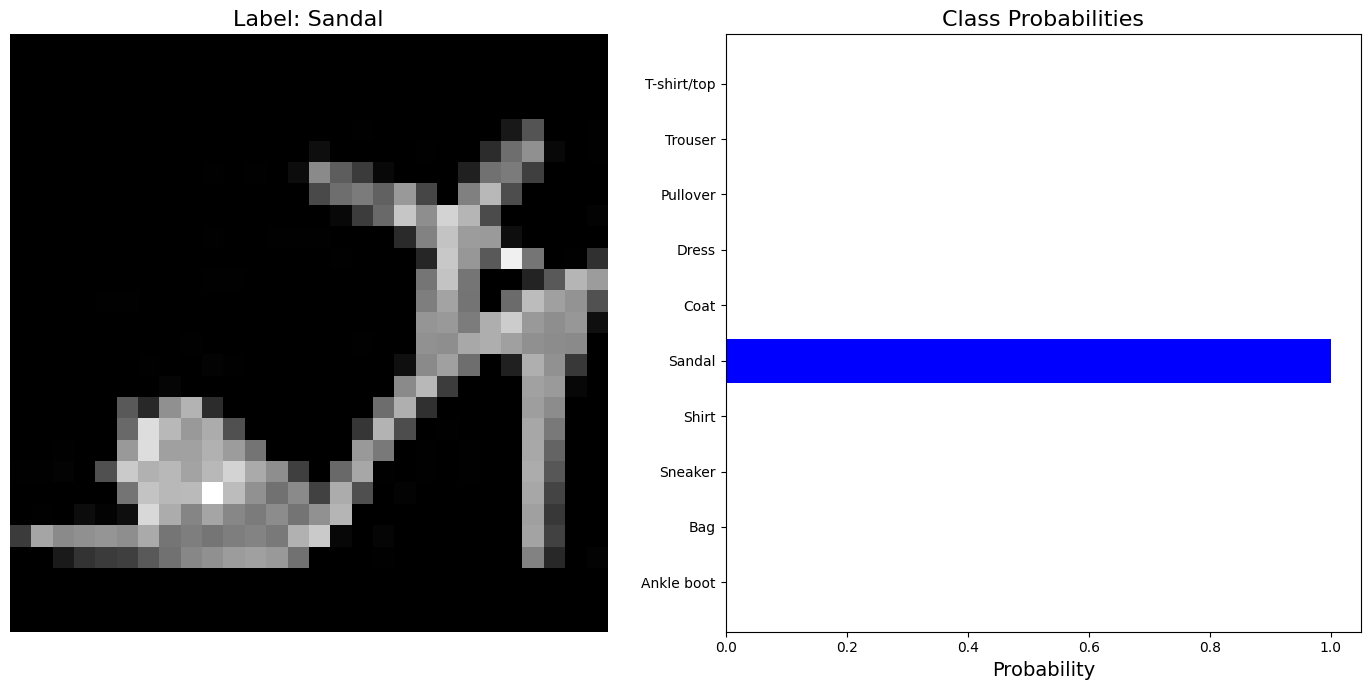

In [223]:
def view_prediction(image, label, probabilities, class_names):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # Plot the image in black and white
    ax1.imshow(image.squeeze(), cmap='gray')
    ax1.set_title(f"Label: {class_names[label]}", fontsize=16)
    ax1.axis('off')

    # Plot the probabilities
    y_pos = np.arange(len(class_names))
    ax2.barh(y_pos, probabilities, align='center', color='blue', ecolor='black')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(class_names)
    ax2.invert_yaxis()  # labels read top-to-bottom
    ax2.set_xlabel('Probability', fontsize=14)
    ax2.set_title('Class Probabilities', fontsize=16)

    plt.tight_layout()
    plt.show()

# Evaluate the model on a few samples
model.eval()
sample_indices = np.random.choice(indices, size=5, replace=False)

for idx in sample_indices:
    image, label = dataset[idx]
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        probabilities = torch.nn.functional.softmax(output, dim=1).squeeze().numpy()

    view_prediction(image.squeeze().numpy(), label, probabilities, dataset.classes)

### Save the model

In [224]:
torch.save(model, 'model')

### Calculate accuracy on the test set

In [225]:
test_dataset = FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
test_dl = DataLoader(test_dataset, batch_size)

In [226]:
def evaluate(model, data_loader):
    """
    Computes accuracy of the model on the provided data loader.

    Args:
        model: ImageClassifierNet object
        data_loader: DataLoader object

    Returns:
        Accuracy as a float value between 0 and 1.
    """
    model.eval()  # Set the model to evaluation mode
    num_correct_predictions = 0
    num_total_samples = 0

    for batch_data, batch_labels in data_loader:
        predictions = model(batch_data)
        predicted_classes = predictions.argmax(dim=1)
        num_correct_predictions += (predicted_classes == batch_labels).sum().item()
        num_total_samples += batch_labels.shape[0]

    accuracy = num_correct_predictions / num_total_samples if num_total_samples > 0 else 0
    return accuracy

In [227]:
print("Test Accuracy = {:.4f}".format(evaluate(model, test_dl)))

Test Accuracy = 0.9125
